# Environment

In [300]:
import pandas as pd
import numpy as np
from intervaltree import IntervalTree
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple
import os
import gffutils


# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

import importlib
import functions
importlib.reload(functions)
from functions import *

Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords


In [301]:
# Example usage
peaks_file = "./DATA/Peak.csv"
output_dir = "./output"
dexseq_file = f"{output_dir}/dexseq_results_PW1_vs_combined_controls_filtered.csv"
output_prefix = f"{output_dir}/overlap_analysis"

# Load results

In [302]:
gff_file = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords/DATA/v38/gencode.v38.annotation.dexseq.gff"
db = gffutils.create_db(gff_file, ":memory:", merge_strategy="create_unique")

In [303]:
enriched_overlaps_df3 = pd.read_excel(f'{output_dir}/enriched_overlaps_df3_with_sum_scores.xlsx')

In [304]:
pd.set_option('display.max_columns', None)
print(enriched_overlaps_df3[enriched_overlaps_df3.peak_name == 'chr1:70148486-70148679'].shape)
enriched_overlaps_df3[(enriched_overlaps_df3.peak_name == 'chr1:70148486-70148679') & (abs(enriched_overlaps_df3.exon_log2fc) > 0.3)]

(6, 27)


,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,groupID,geneID,gene_name,sum_als1_score,sum_als2_score
562,E063,132,chr1:70148486-70148679,ENSG00000033122.21:E063,chr1,635.5,0,0.354959,0.0,0.6355,E063,11,6,117.0,NaN,0,0,NaN,E064,7,6,198.0,ENSG00000033122.21,ENSG00000033122,LRRC7,18,12
5782,E062,132,chr1:70148486-70148679,ENSG00000033122.21:E062,chr1,1386.5,0,0.359327,0.0,1.3865,NaN,0,0,NaN,E061,6,6,75.0,NaN,0,0,NaN,ENSG00000033122.21,ENSG00000033122,LRRC7,6,6
6883,E061,132,chr1:70148486-70148679,ENSG00000033122.21:E061,chr1,1424.5,0,0.349547,0.0,1.4245,NaN,0,0,NaN,E060,5,4,43.0,NaN,0,0,NaN,ENSG00000033122.21,ENSG00000033122,LRRC7,5,4


# Explore the data

Genes of interest:
- LRRC7
- CNOT1
- EEF1A1
- FARP1

## LRRC7

In [305]:
gene_name = 'LRRC7'
enriched_overlaps_df3_selected = enriched_overlaps_df3[(enriched_overlaps_df3.gene_name == gene_name) & (abs(enriched_overlaps_df3.exon_log2fc) > 0.3) & (enriched_overlaps_df3.exon_padj < 0.05)]
groupID = enriched_overlaps_df3_selected.groupID.unique()[0]
print(f"Gene ID: {groupID}")
enriched_overlaps_df3_selected

Gene ID: ENSG00000033122.21


,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,groupID,geneID,gene_name,sum_als1_score,sum_als2_score
562,E063,132,chr1:70148486-70148679,ENSG00000033122.21:E063,chr1,635.5,0,0.354959,0.0,0.6355,E063,11,6,117.0,NaN,0,0,NaN,E064,7,6,198.0,ENSG00000033122.21,ENSG00000033122,LRRC7,18,12
5782,E062,132,chr1:70148486-70148679,ENSG00000033122.21:E062,chr1,1386.5,0,0.359327,0.0,1.3865,NaN,0,0,NaN,E061,6,6,75.0,NaN,0,0,NaN,ENSG00000033122.21,ENSG00000033122,LRRC7,6,6
6883,E061,132,chr1:70148486-70148679,ENSG00000033122.21:E061,chr1,1424.5,0,0.349547,0.0,1.4245,NaN,0,0,NaN,E060,5,4,43.0,NaN,0,0,NaN,ENSG00000033122.21,ENSG00000033122,LRRC7,5,4


In [306]:
peak_coords = enriched_overlaps_df3_selected.peak_name.str.split(':').str[1].unique()[0].split('-')
peak = (int(peak_coords[0]), int(peak_coords[1]), "Peak")
peak

(70148486, 70148679, 'Peak')

### DexSeq exons

In [307]:
examine_exon(db, gene_id=groupID, exon_id="063")

Searching for gene_id: ENSG00000033122.21, exon_id: 063


Found 64 exons for this gene

Exon 063 details:
Position: 63 out of 64 exons
Coordinates: chr1:70147889-70148005
Length: 116 bp
Transcripts: ['ENST00000441830.1+ENST00000607936.5+ENST00000588515.5']

Surrounding exons:
Previous exon: exonic_part_24234
Previous coordinates: chr1:70147196-70147196
Next exon: exonic_part_24236
Next coordinates: chr1:70151748-70151945


In [308]:
print_all_exons(db, gene_id=groupID)


COMM2 Gene Exon Details:
Total number of exons: 64

Exon coordinates:
Exon ID    Coordinates                    Length     Transcripts
--------------------------------------------------------------------------------
E001       chr1:69567922-69568397         475        ENST00000651989.2
E002       chr1:69568398-69568449         51         ENST00000310961.9+ENST00000651989.2
E003       chr1:69568450-69568641         191        ENST00000310961.9+ENST00000370958.5+ENST00000651989.2
E004       chr1:69678381-69678478         97         ENST00000310961.9+ENST00000370958.5+ENST00000651989.2
E005       chr1:69716142-69716218         76         ENST00000310961.9
E006       chr1:69760175-69760186         11         ENST00000651217.1
E007       chr1:69760187-69760190         3          ENST00000651217.1+ENST00000415775.2
E008       chr1:69760191-69760393         202        ENST00000370958.5+ENST00000415775.2+ENST00000310961.9+ENST00000651217.1+ENST00000651989.2
E009       chr1:69792043-69792160  

In [309]:
dexseq_parts = extract_exon_coordinates(db, gene_id=groupID)

### Biological exons from Ensembl

In [310]:
gene_id = groupID.split('.')[0]
get_ensembl_exon_info(gene_id=gene_id, dexseq_parts=dexseq_parts)


Ensembl Transcript Information:
Gene: LRRC7 (ENSG00000033122)

Found 14 transcripts

Canonical transcript structure:
Transcript ID: ENST00000651989
Exon Number  Coordinates                    Length    
--------------------------------------------------------------------------------
1            chr1:69567922-69568641         720       
2            chr1:69678381-69678478         98        
3            chr1:69760191-69760393         203       
4            chr1:69792043-69792160         118       
5            chr1:69825748-69825826         79        
6            chr1:69834780-69834869         90        
7            chr1:69838227-69838283         57        
8            chr1:69931507-69931570         64        
9            chr1:69980379-69980453         75        
10           chr1:69986242-69986386         145       
11           chr1:69994561-69994633         73        
12           chr1:70011797-70011926         130       
13           chr1:70012974-70013089         116       


In [311]:
biological_exons = get_canonical_exons(gene_id=gene_id)

### Visualize gene structure showing biological exons, DexSeq parts, and peak.


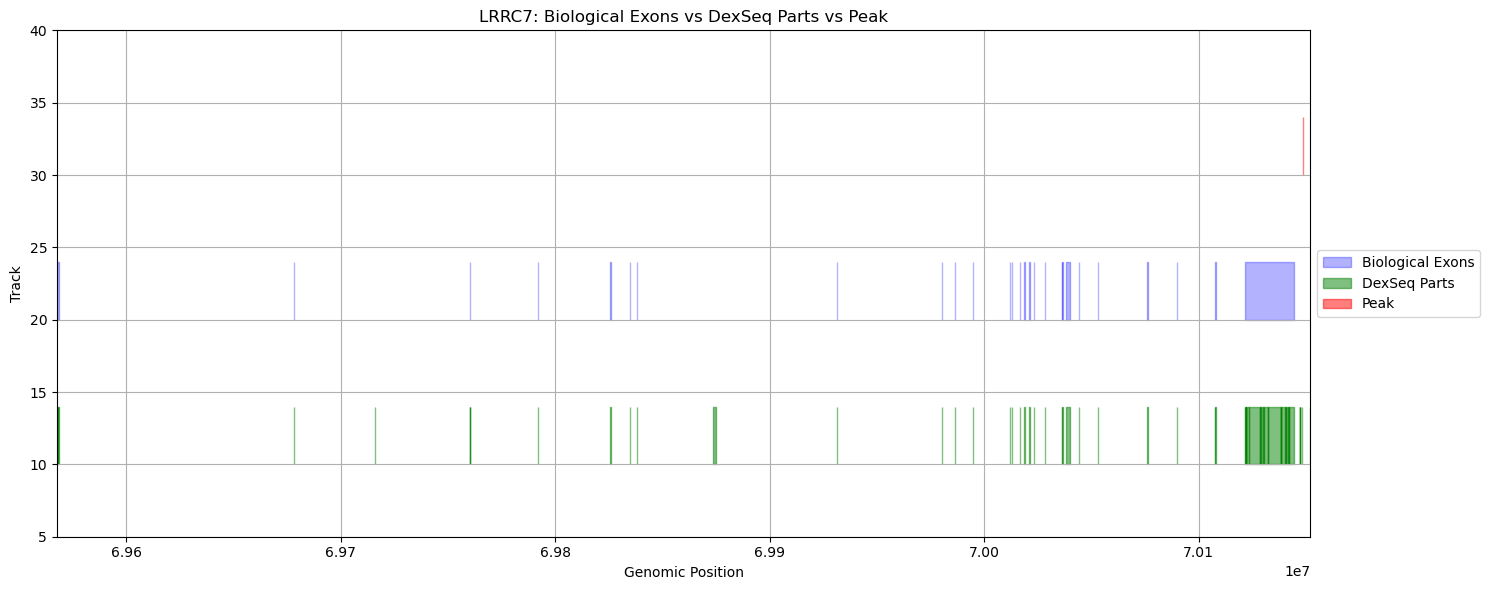

In [312]:
# Using your existing data
fig, ax, intersections = visualize_gene_structure(
    biological_exons=biological_exons,
    dexseq_parts=dexseq_parts,
    peak=peak,
    gene_name=gene_name
)
plt.show()

for intersection in intersections:
    print(f"Intersection with {intersection['exon']}: {intersection['length']} bp")

## CNOT1

In [313]:
gene_name = 'CNOT1'
enriched_overlaps_df3_selected = enriched_overlaps_df3[(enriched_overlaps_df3.gene_name == gene_name) & (abs(enriched_overlaps_df3.exon_log2fc) > 0.3) & (enriched_overlaps_df3.exon_padj < 0.05)]
groupID = enriched_overlaps_df3_selected.groupID.unique()[0]
print(f"Gene ID: {groupID}")
enriched_overlaps_df3_selected

Gene ID: ENSG00000125107.19


,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,groupID,geneID,gene_name,sum_als1_score,sum_als2_score
272,E033,282,chr16:58542228-58542484,ENSG00000125107.19:E033,chr16,-1110.5,0,-0.37625,0.0,-1.1105,E033,9,7,280.0,E032,5,5,124.0,E034,5,6,196.0,ENSG00000125107.19,ENSG00000125107,CNOT1,19,18


In [314]:
peak_coords = enriched_overlaps_df3_selected.peak_name.str.split(':').str[1].unique()[0].split('-')
peak = (int(peak_coords[0]), int(peak_coords[1]), "Peak")
peak

(58542228, 58542484, 'Peak')

### DexSeq exons

In [315]:
examine_exon(db, gene_id=groupID, exon_id="033")

Searching for gene_id: ENSG00000125107.19, exon_id: 033


Found 98 exons for this gene

Exon 033 details:
Position: 33 out of 98 exons
Coordinates: chr16:58543327-58543606
Length: 279 bp
Transcripts: ['ENST00000441024.6']

Surrounding exons:
Previous exon: exonic_part_247107
Previous coordinates: chr16:58543169-58543292
Next exon: exonic_part_247109
Next coordinates: chr16:58543607-58543802


In [316]:
print_all_exons(db, gene_id=groupID)


COMM2 Gene Exon Details:
Total number of exons: 98

Exon coordinates:
Exon ID    Coordinates                    Length     Transcripts
--------------------------------------------------------------------------------
E001       chr16:58519951-58520683        732        ENST00000317147.10
E002       chr16:58520684-58520694        10         ENST00000563130.5+ENST00000317147.10
E003       chr16:58520695-58520705        10         ENST00000563130.5+ENST00000569240.5+ENST00000317147.10
E004       chr16:58520706-58521014        308        ENST00000563130.5+ENST00000569240.5+ENST00000317147.10+ENST00000567188.5
E005       chr16:58521015-58521036        21         ENST00000563130.5+ENST00000569924.1+ENST00000569240.5+ENST00000317147.10+ENST00000567188.5
E006       chr16:58521183-58521317        134        ENST00000563130.5+ENST00000569924.1+ENST00000569240.5+ENST00000317147.10+ENST00000567188.5
E007       chr16:58523370-58523502        132        ENST00000563130.5+ENST00000569924.1+ENST000005

In [317]:
dexseq_parts = extract_exon_coordinates(db, gene_id=groupID)

### Biological exons from Ensembl

In [318]:
gene_id = groupID.split('.')[0]
get_ensembl_exon_info(gene_id=gene_id, dexseq_parts=dexseq_parts)


Ensembl Transcript Information:
Gene: CNOT1 (ENSG00000125107)

Found 22 transcripts

Canonical transcript structure:
Transcript ID: ENST00000317147
Exon Number  Coordinates                    Length    
--------------------------------------------------------------------------------
1            chr16:58519951-58521036        1086      
2            chr16:58521183-58521317        135       
3            chr16:58523370-58523502        133       
4            chr16:58525179-58525359        181       
5            chr16:58525989-58526138        150       
6            chr16:58528475-58528648        174       
7            chr16:58530246-58530347        102       
8            chr16:58531958-58532075        118       
9            chr16:58532232-58532395        164       
10           chr16:58534147-58534395        249       
11           chr16:58536989-58537220        232       
12           chr16:58537891-58538060        170       
13           chr16:58538158-58538266        109       


In [319]:
biological_exons = get_canonical_exons(gene_id=gene_id)

### Visualize gene structure showing biological exons, DexSeq parts, and peak.


Peak overlaps with Biological Exon 17: 58,542,231 - 58,542,335 (104 bp)
Peak overlaps with Biological Exon 18: 58,542,428 - 58,542,484 (56 bp)


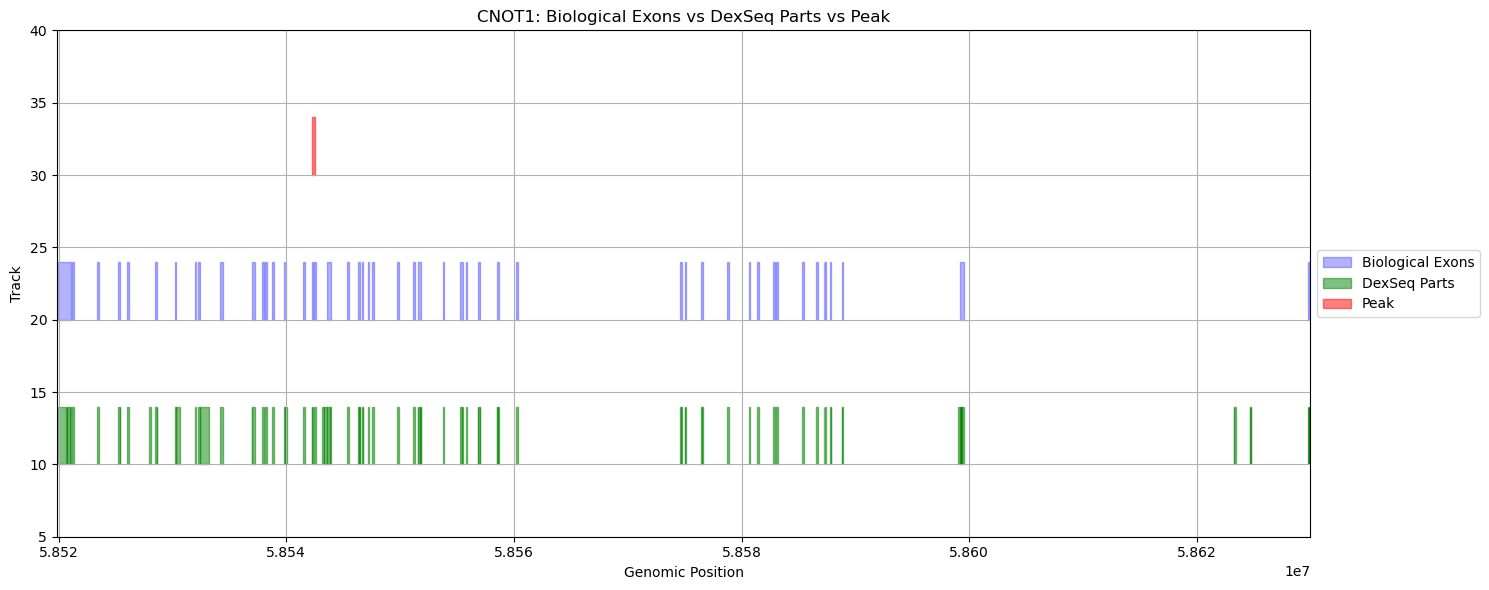

Intersection with Biological Exon 17: 104 bp
Intersection with Biological Exon 18: 56 bp


In [320]:
# Using your existing data
fig, ax, intersections = visualize_gene_structure(
    biological_exons=biological_exons,
    dexseq_parts=dexseq_parts,
    peak=peak,
    gene_name=gene_name
)
plt.show()

for intersection in intersections:
    print(f"Intersection with {intersection['exon']}: {intersection['length']} bp")


Closest biological exons to E033 (ENST00000441024.6):
Upstream: Biological Exon 18
  Distance: 968 bp
  Coordinates: 58,542,428 - 58,542,568
Downstream: Biological Exon 19
  Distance: 288 bp
  Coordinates: 58,543,607 - 58,543,903



Peak overlaps with Biological Exon 17: 58,542,231 - 58,542,335 (104 bp)

Peak overlaps with Biological Exon 18: 58,542,428 - 58,542,484 (56 bp)


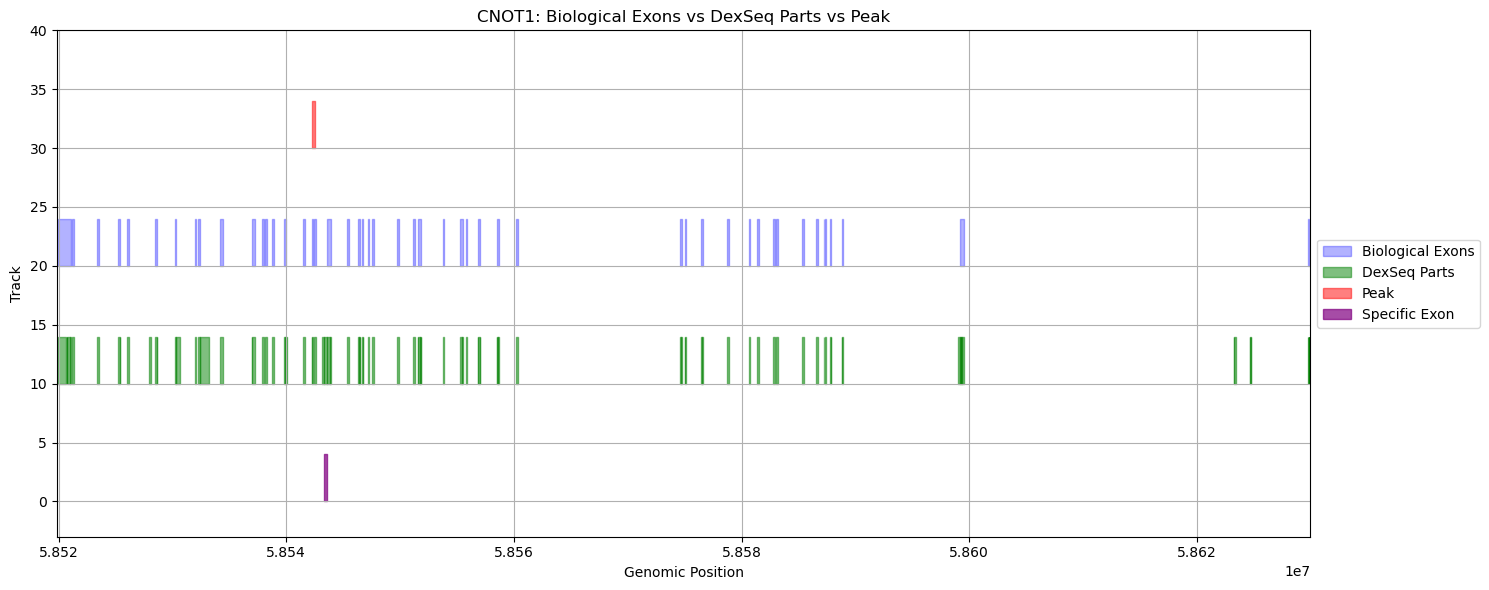

In [321]:
specific_exon = (58543327, 58543606, "E033 (ENST00000441024.6)")        
visualize_gene_structure_with_specific_exon(biological_exons=biological_exons, dexseq_parts=dexseq_parts, peak=peak, specific_exon=specific_exon, gene_name=gene_name);

## EEF1A1

In [322]:
gene_name = 'EEF1A1'
enriched_overlaps_df3_selected = enriched_overlaps_df3[(enriched_overlaps_df3.gene_name == gene_name) & (abs(enriched_overlaps_df3.exon_log2fc) > 0.3) & (enriched_overlaps_df3.exon_padj < 0.05)]
groupID = enriched_overlaps_df3_selected.groupID.unique()[0]
print(f"Gene ID: {groupID}")
enriched_overlaps_df3_selected

Gene ID: ENSG00000156508.19


,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,groupID,geneID,gene_name,sum_als1_score,sum_als2_score
1004,E030,930,chr6:73518169-73518569,ENSG00000156508.19:E030,chr6,-1734.5,0,0.436381,0.000000e+00,-1.7345,E030,9,10,94.0,E029,7,7,165.0,NaN,0,0,NaN,ENSG00000156508.19,ENSG00000156508,EEF1A1,16,17
5862,E016,930,chr6:73518169-73518569,ENSG00000156508.19:E016,chr6,60.0,88,0.414054,4.825698e-249,0.0600,E016,6,6,89.0,NaN,0,0,NaN,NaN,0,0,NaN,ENSG00000156508.19,ENSG00000156508,EEF1A1,6,6


In [323]:
peak_coords = enriched_overlaps_df3_selected.peak_name.str.split(':').str[1].unique()[0].split('-')
peak = (int(peak_coords[0]), int(peak_coords[1]), "Peak")
peak

(73518169, 73518569, 'Peak')

### DexSeq exons

In [324]:
examine_exon(db, gene_id=groupID, exon_id="016")

Searching for gene_id: ENSG00000156508.19, exon_id: 016


Found 50 exons for this gene

Exon 016 details:
Position: 16 out of 50 exons
Coordinates: chr6:73518265-73518353
Length: 88 bp
Transcripts: ['ENST00000678041.1+ENST00000679031.1+ENST00000677062.1+ENST00000490569.6']

Surrounding exons:
Previous exon: exonic_part_554313
Previous coordinates: chr6:73518250-73518264
Next exon: exonic_part_554315
Next coordinates: chr6:73518354-73518610


In [325]:
print_all_exons(db, gene_id=groupID)


COMM2 Gene Exon Details:
Total number of exons: 50

Exon coordinates:
Exon ID    Coordinates                    Length     Transcripts
--------------------------------------------------------------------------------
E001       chr6:73489308-73492024         2716       ENST00000676547.1
E002       chr6:73492025-73492339         314        ENST00000676547.1+ENST00000423099.1
E003       chr6:73492340-73492687         347        ENST00000676547.1
E004       chr6:73492688-73492742         54         ENST00000676547.1+ENST00000423099.1
E005       chr6:73492743-73492804         61         ENST00000676547.1
E006       chr6:73515750-73515764         14         ENST00000316292.13+ENST00000610520.5+ENST00000309268.11
E007       chr6:73515765-73517514         1749       ENST00000316292.13+ENST00000615060.5+ENST00000610520.5+ENST00000309268.11
E008       chr6:73517515-73517518         3          ENST00000676710.1+ENST00000678515.1+ENST00000615060.5+ENST00000331523.7+ENST00000309268.11+ENST00000316

In [326]:
dexseq_parts = extract_exon_coordinates(db, gene_id=groupID)

### Biological exons from Ensembl

In [327]:
gene_id = groupID.split('.')[0]
get_ensembl_exon_info(gene_id=gene_id, dexseq_parts=dexseq_parts)


Ensembl Transcript Information:
Gene: EEF1A1 (ENSG00000156508)

Found 23 transcripts

Canonical transcript structure:
Transcript ID: ENST00000309268
Exon Number  Coordinates                    Length    
--------------------------------------------------------------------------------
1            chr6:73515750-73517934         2185      
2            chr6:73518030-73518264         235       
3            chr6:73518354-73518610         257       
4            chr6:73518698-73518848         151       
5            chr6:73518932-73519228         297       
6            chr6:73519337-73519516         180       
7            chr6:73519883-73520056         174       
8            chr6:73521000-73521032         33        

DexSeq parts and their overlaps:
DexSeq Part     Coordinates                    Overlapping Biological Exons
--------------------------------------------------------------------------------
E001            chr6:73489308-73492024         Exon 1 (ENST00000676547, 73489308-73

In [328]:
biological_exons = get_canonical_exons(gene_id=gene_id)

### Visualize gene structure showing biological exons, DexSeq parts, and peak.


Peak overlaps with Biological Exon 2: 73,518,169 - 73,518,264 (95 bp)
Peak overlaps with Biological Exon 3: 73,518,354 - 73,518,569 (215 bp)


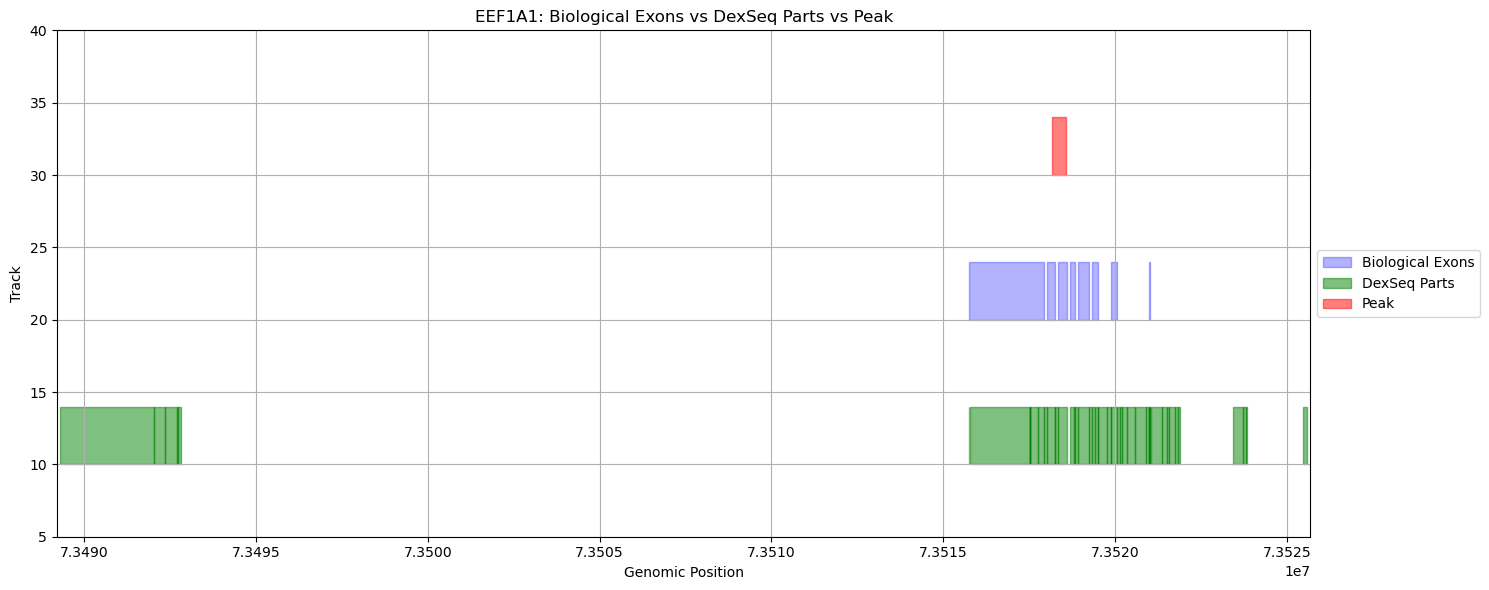

Intersection with Biological Exon 2: 95 bp
Intersection with Biological Exon 3: 215 bp


In [329]:
# Using your existing data
fig, ax, intersections = visualize_gene_structure(
    biological_exons=biological_exons,
    dexseq_parts=dexseq_parts,
    peak=peak,
    gene_name=gene_name
)
plt.show()

for intersection in intersections:
    print(f"Intersection with {intersection['exon']}: {intersection['length']} bp")

## FARP1

In [330]:
gene_name = 'FARP1'
enriched_overlaps_df3_selected = enriched_overlaps_df3[(enriched_overlaps_df3.gene_name == gene_name) & (abs(enriched_overlaps_df3.exon_log2fc) > 0.3) & (enriched_overlaps_df3.exon_padj < 0.05)]
groupID = enriched_overlaps_df3_selected.groupID.unique()[0]
print(f"Gene ID: {groupID}")
enriched_overlaps_df3_selected

Gene ID: ENSG00000152767.17


,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,groupID,geneID,gene_name,sum_als1_score,sum_als2_score
2524,E064,333,chr13:98389956-98390143,ENSG00000152767.17:E064,chr13,-648.5,0,-0.784351,0.0,-0.6485,E064,7,9,227.0,NaN,0,0,NaN,E065,5,5,69.0,ENSG00000152767.17,ENSG00000152767,FARP1,12,14


In [331]:
peak_coords = enriched_overlaps_df3_selected.peak_name.str.split(':').str[1].unique()[0].split('-')
peak = (int(peak_coords[0]), int(peak_coords[1]), "Peak")
peak

(98389956, 98390143, 'Peak')

### DexSeq exons

In [332]:
examine_exon(db, gene_id=groupID, exon_id="064")

Searching for gene_id: ENSG00000152767.17, exon_id: 064


Found 104 exons for this gene

Exon 064 details:
Position: 64 out of 104 exons
Coordinates: chr13:98390585-98390811
Length: 226 bp
Transcripts: ['ENST00000600190.1']

Surrounding exons:
Previous exon: exonic_part_173609
Previous coordinates: chr13:98389957-98390120
Next exon: exonic_part_173611
Next coordinates: chr13:98390812-98390880


In [333]:
print_all_exons(db, gene_id=groupID)


COMM2 Gene Exon Details:
Total number of exons: 104

Exon coordinates:
Exon ID    Coordinates                    Length     Transcripts
--------------------------------------------------------------------------------
E001       chr13:98142562-98142777        215        ENST00000595437.5
E002       chr13:98143094-98143097        3          ENST00000319562.11
E003       chr13:98143098-98143179        81         ENST00000627049.2+ENST00000319562.11
E004       chr13:98143180-98143415        235        ENST00000600648.1+ENST00000627049.2+ENST00000319562.11
E005       chr13:98143416-98143479        63         ENST00000600648.1+ENST00000627049.2+ENST00000319562.11+ENST00000596580.2
E006       chr13:98143480-98143492        12         ENST00000596580.2+ENST00000376581.9+ENST00000319562.11+ENST00000600648.1+ENST00000627049.2
E007       chr13:98159492-98159598        106        ENST00000600648.1
E008       chr13:98177817-98177929        112        ENST00000598389.5
E009       chr13:98213220-982

In [334]:
dexseq_parts = extract_exon_coordinates(db, gene_id=groupID)

### Biological exons from Ensembl

In [335]:
gene_id = groupID.split('.')[0]
get_ensembl_exon_info(gene_id=gene_id, dexseq_parts=dexseq_parts)


Ensembl Transcript Information:
Gene: FARP1 (ENSG00000152767)

Found 42 transcripts

Canonical transcript structure:
Transcript ID: ENST00000319562
Exon Number  Coordinates                    Length    
--------------------------------------------------------------------------------
1            chr13:98143094-98143492        399       
2            chr13:98213220-98213413        194       
3            chr13:98343762-98343866        105       
4            chr13:98365395-98365437        43        
5            chr13:98368117-98368195        79        
6            chr13:98377821-98377918        98        
7            chr13:98384730-98384844        115       
8            chr13:98385667-98385814        148       
9            chr13:98388383-98388478        96        
10           chr13:98389957-98390120        164       
11           chr13:98390812-98390880        69        
12           chr13:98393643-98393718        76        
13           chr13:98395227-98395476        250       


In [336]:
biological_exons = get_canonical_exons(gene_id=gene_id)

### Visualize gene structure showing biological exons, DexSeq parts, and peak.


Peak overlaps with Biological Exon 10: 98,389,957 - 98,390,120 (163 bp)


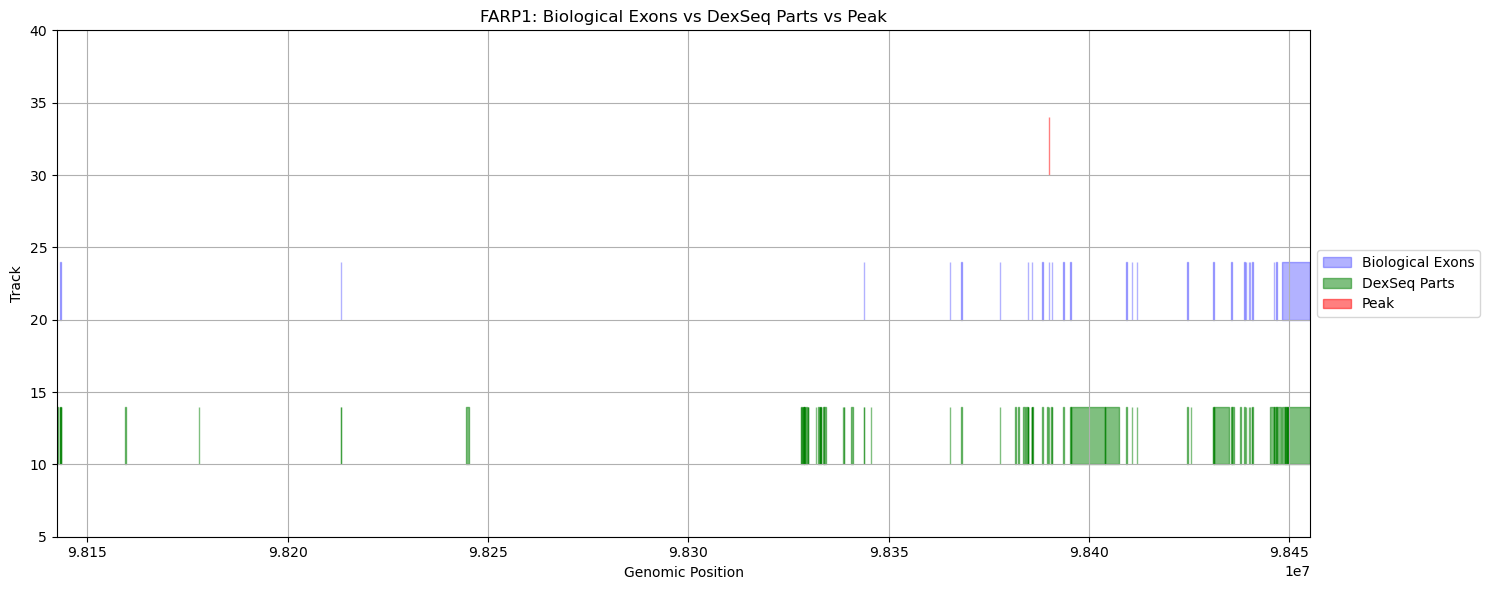

Intersection with Biological Exon 10: 163 bp


In [337]:
# Using your existing data
fig, ax, intersections = visualize_gene_structure(
    biological_exons=biological_exons,
    dexseq_parts=dexseq_parts,
    peak=peak,
    gene_name=gene_name
)
plt.show()

for intersection in intersections:
    print(f"Intersection with {intersection['exon']}: {intersection['length']} bp")